# 📍 Positional Encoding in Transformers

Transformers process all tokens at once — unlike RNNs, they don't know the position of a word in a sentence by default.

To fix this, we add **Positional Encoding** to the input embeddings, so the model can learn the concept of *order*.

This notebook explains:
- Why positional encoding is needed
- How sinusoidal encoding works (from the original Transformer paper)
- Visualize the encoding


## ❓ Why Do We Need Positional Encoding?

Transformers treat input tokens as a set — they don’t inherently understand the *sequence* of words.

Example:
- “The cat sat on the mat.”
- “The mat sat on the cat.” ➡️ Same tokens, different meaning.

To help the model know *which word comes first, second, etc.*, we inject **position information** into the input embeddings.

This is done by adding a positional encoding vector to each token's embedding.


## 🧮 Sinusoidal Encoding Formula

The original Transformer paper uses the following for each position `pos` and dimension `i`:

- PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
- PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))

This creates a unique pattern for each position, which:
- Encodes relative distance
- Has nice mathematical properties for attention to learn from


#code to generate positional encoding

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def get_positional_encoding(max_len, d_model):
    pos = np.arange(max_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = pos * angle_rates

    # Apply sin to even indices and cos to odd
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)


In [4]:
# Example sentence
sentence = "Hello world this is GenAI"
tokens = sentence.split()  # Simple tokenization
max_len = len(tokens)
d_model = 16  # Keep it small for readability

# Get positional encodings for the sentence
pos_encoding = get_positional_encoding(max_len, d_model)

# Display positional encoding for each word
for idx, word in enumerate(tokens):
    print(f"{word}: {pos_encoding[0, idx].numpy()}")


Hello: [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
world: [8.4147096e-01 5.4030228e-01 3.1098360e-01 9.5041525e-01 9.9833414e-02
 9.9500418e-01 3.1617507e-02 9.9950004e-01 9.9998331e-03 9.9994999e-01
 3.1622723e-03 9.9999499e-01 9.9999981e-04 9.9999952e-01 3.1622776e-04
 9.9999994e-01]
this: [ 9.0929741e-01 -4.1614684e-01  5.9112710e-01  8.0657840e-01
  1.9866933e-01  9.8006660e-01  6.3203394e-02  9.9800068e-01
  1.9998666e-02  9.9980003e-01  6.3245133e-03  9.9997997e-01
  1.9999987e-03  9.9999797e-01  6.3245551e-04  9.9999982e-01]
is: [ 1.4112000e-01 -9.8999250e-01  8.1264889e-01  5.8275360e-01
  2.9552022e-01  9.5533651e-01  9.4726093e-02  9.9550337e-01
  2.9995501e-02  9.9955004e-01  9.4866911e-03  9.9995500e-01
  2.9999956e-03  9.9999553e-01  9.4868318e-04  9.9999952e-01]
GenAI: [-0.7568025  -0.6536436   0.95358074  0.30113748  0.38941833  0.921061
  0.12615407  0.99201065  0.03998933  0.9992001   0.01264877  0.99992
  0.00399999  0.999992    0.00126491  0.9999992 ]


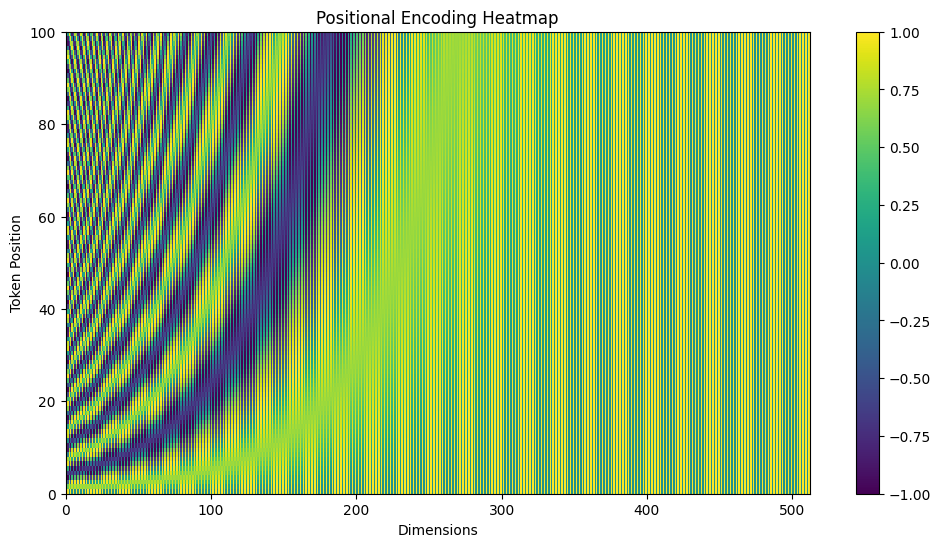

In [5]:
pos_encoding = get_positional_encoding(100, 512)
plt.figure(figsize=(12, 6))
plt.pcolormesh(pos_encoding[0, :, :], cmap='viridis')
plt.xlabel('Dimensions')
plt.ylabel('Token Position')
plt.title('Positional Encoding Heatmap')
plt.colorbar()
plt.show()


## ✅ Summary

- Transformers need positional information to understand word order.
- This is achieved by adding **positional encoding** to the token embeddings.
- Sinusoidal encoding is fixed (non-learnable) and encodes positions using patterns that models can generalize from.
- Some modern models now use **learned positional embeddings**, which are trainable.
